In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [282]:
fg = pd.read_csv("~/Desktop/Datasets/Chess_Datasets/Fabi_Games.csv", encoding='cp1252')
for index, row in fg.iterrows():
    if row['Res'] == "Jan-00":
        fg.at[index, 'Res'] = "1-0"

fg.head(50)

,Date,White,Black,W ELO,B ELO,Av ELO,Event,Site,ECO,Opening,Round,Res,Mvs
0,5/15/2023,"Rapport, Richard","Caruana, Fabiano",2762.0,2781,2771,Superbet Chess Classic Romania,"Bucharest, Romania",A28,"English Opening, King's English Variation, Fou...",9.2,½-½,30
1,5/14/2023,"Caruana, Fabiano","Giri, Anish",2781.0,2771,2776,Superbet Chess Classic Romania,"Bucharest, Romania",C53,"Italian Game, Classical Variation, Giuoco Pian...",8.1,½-½,26
2,5/13/2023,"So, Wesley","Caruana, Fabiano",2778.0,2781,2779,Superbet Chess Classic Romania,"Bucharest, Romania",E06,"Catalan Opening, Closed Variation",7.2,½-½,24
3,5/12/2023,"Caruana, Fabiano","Firouzja, Alireza",2781.0,2804,2792,Superbet Chess Classic Romania,"Bucharest, Romania",A11,"English Opening, Anglo-Slav Variation, General",6.3,½-½,45
4,5/12/2023,"Caruana, Fabiano","Fedoseev, Vladimir",2781.0,2704,2742,PRO League KO 2023,chess.com INT,A21,"English Opening, King's English Variation, Kra...",1.3,1-0,76
5,5/12/2023,"Nakamura, Hikaru","Caruana, Fabiano",2750.0,2781,2765,PRO League KO 2023,chess.com INT,B51,"Sicilian Defense, Canal Attack",1.4,½-½,58
6,5/12/2023,"Nurmanova, Alua","Caruana, Fabiano",2240.0,2781,2510,PRO League KO 2023,chess.com INT,C84,"Spanish Game, Closed Variations",1.1,0-1,36
7,5/10/2023,"Duda, Jan-Krzysztof","Caruana, Fabiano",2750.0,2781,2765,Superbet Chess Classic Romania,"Bucharest, Romania",C78,"Spanish Game, Morphy Defense",5.3,½-½,31
8,5/9/2023,"Caruana, Fabiano","Nepomniachtchi, Ian",2781.0,2773,2777,Superbet Chess Classic Romania,"Bucharest, Romania",D32,"Tarrasch Defense, Symmetrical Variation",4.2,1-0,70
9,5/8/2023,"Caruana, Fabiano","Vachier-Lagrave, Maxime",2781.0,2761,2771,Superbet Chess Classic Romania,"Bucharest, Romania",E61,"Indian Game, Kingside Fianchetto",3.4,1-0,23


In [283]:
fg = fg[::-1]
fg.head()

,Date,White,Black,W ELO,B ELO,Av ELO,Event,Site,ECO,Opening,Round,Res,Mvs
999,NaN,"Navara, David","Caruana, Fabiano",2697.0,2792,2744,7th Gashimov Mem Blitz,Baku AZE,E94,"King's Indian Defense, Orthodox Variation",4.1,1-0,44
998,NaN,"Caruana, Fabiano","Rapport, Richard",2792.0,2763,2777,7th Gashimov Mem Blitz,Baku AZE,A40,"Horwitz Defense, General",3.2,½-½,52
997,NaN,"Caruana, Fabiano","Mamedyarov, Shakhriyar",2792.0,2767,2779,7th Gashimov Mem Blitz,Baku AZE,A18,"English Opening, Anglo-Indian Defense, Flohr-M...",7.3,1-0,57
996,NaN,"Rapport, Richard","Caruana, Fabiano",2763.0,2792,2777,7th Gashimov Mem Blitz,Baku AZE,C47,"Four Knights Game, Scotch Variation, Accepted",10.3,½-½,27
995,NaN,"Caruana, Fabiano","Anand, Viswanathan",2792.0,2751,2771,7th Gashimov Mem Blitz,Baku AZE,C60,"Spanish Game, General",13.3,1-0,69


In [284]:
column_data_types = fg.dtypes
print(column_data_types)

Date        object
White       object
Black       object
W ELO      float64
B ELO        int64
Av ELO       int64
Event       object
Site        object
ECO         object
Opening     object
Round      float64
Res         object
Mvs          int64
dtype: object


In [285]:
ten_games = fg.head(100)
ten_games

,Date,White,Black,W ELO,B ELO,Av ELO,Event,Site,ECO,Opening,Round,Res,Mvs
999,NaN,"Navara, David","Caruana, Fabiano",2697.0,2792,2744,7th Gashimov Mem Blitz,Baku AZE,E94,"King's Indian Defense, Orthodox Variation",4.1,1-0,44
998,NaN,"Caruana, Fabiano","Rapport, Richard",2792.0,2763,2777,7th Gashimov Mem Blitz,Baku AZE,A40,"Horwitz Defense, General",3.2,½-½,52
997,NaN,"Caruana, Fabiano","Mamedyarov, Shakhriyar",2792.0,2767,2779,7th Gashimov Mem Blitz,Baku AZE,A18,"English Opening, Anglo-Indian Defense, Flohr-M...",7.3,1-0,57
996,NaN,"Rapport, Richard","Caruana, Fabiano",2763.0,2792,2777,7th Gashimov Mem Blitz,Baku AZE,C47,"Four Knights Game, Scotch Variation, Accepted",10.3,½-½,27
995,NaN,"Caruana, Fabiano","Anand, Viswanathan",2792.0,2751,2771,7th Gashimov Mem Blitz,Baku AZE,C60,"Spanish Game, General",13.3,1-0,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,NaN,"Caruana, Fabiano","Martirosyan, Haik M",2792.0,2633,2712,Chess.com Rapid Wk2 Swiss,chess.com INT,C60,"Spanish Game, General",7.0,1-0,43
903,NaN,"Caruana, Fabiano","So, Wesley",2792.0,2772,2782,Chess.com Rapid Wk2 Swiss,chess.com INT,C67,"Spanish Game, Berlin Defense, Rio Gambit Accepted",5.0,½-½,41
902,NaN,"Caruana, Fabiano","Maghsoodloo, Parham",2792.0,2701,2746,Chess.com Rapid Wk2 Swiss,chess.com INT,C78,"Spanish Game, Morphy Defense",3.0,1-0,42
901,NaN,"Caruana, Fabiano","Erigaisi Arjun,",2792.0,2633,2712,Chess.com Rapid Wk2 Swiss,chess.com INT,B40,"Sicilian Defense, Delayed Alapin Variation",8.0,1-0,47


In [286]:
win_streak = 0
lose_streak = 0
draw_count = 0
for index, row in ten_games.iterrows():
    if row["White"] == 'Caruana, Fabiano':
        if row["Res"] == '1-0':
            win_streak += 1
            draw_count = 0
        elif row["Res"] == '0-1':
            lose_streak += 1
            draw_count = 0
        else:
            draw_count += 1
            if draw_count >= 10:
                win_streak = 0
                lose_streak = 0
    elif row["Black"] == 'Caruana, Fabiano':
        if row["Res"] == '0-1':
            win_streak += 1
            draw_count = 0
        elif row["Res"] == '1-0':
            lose_streak += 1
            draw_count = 0
        else:
            draw_count += 1
            if draw_count >= 10:
                win_streak = 0
                lose_streak = 0

print(win_streak, lose_streak, sep="\n")

def latest_form(dataset):
    
    form = []
    for index, row in dataset.iterrows():
        
        if row["White"] == 'Caruana, Fabiano':
            if row["Res"] == '1-0':
                form.append("W")
            elif row["Res"] == '0-1':
                form.append("L")
            else:
                form.append("D")
        elif row["Black"] == 'Caruana, Fabiano':
            if row["Res"] == '0-1':
                form.append("W")
            elif row["Res"] == '1-0':
                form.append("L")
            else:
                form.append("D")
    last_10_values = form[-1:-11:-1]
    return last_10_values
    
def present_form(dataset):
    
    form = []
    for index, row in dataset.iterrows():
        
        if row["White"] == 'Caruana, Fabiano':
            if row["Res"] == '1-0':
                form.append("W")
            elif row["Res"] == '0-1':
                form.append("L")
            else:
                form.append("D")
        elif row["Black"] == 'Caruana, Fabiano':
            if row["Res"] == '0-1':
                form.append("W")
            elif row["Res"] == '1-0':
                form.append("L")
            else:
                form.append("D")
    last_100_values = form[-1:-100:-1]
    return last_100_values

latest_form(fg)

51
15


['D', 'D', 'D', 'D', 'W', 'D', 'W', 'D', 'W', 'W']

In [287]:
present_form(fg)

['D',
 'D',
 'D',
 'D',
 'W',
 'D',
 'W',
 'D',
 'W',
 'W',
 'D',
 'D',
 'W',
 'W',
 'W',
 'D',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'L',
 'W',
 'L',
 'W',
 'W',
 'L',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'L',
 'L',
 'L',
 'L',
 'W',
 'W',
 'W',
 'W',
 'L',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'L',
 'W',
 'W',
 'L',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'L',
 'W',
 'W',
 'L',
 'W',
 'W',
 'W',
 'W',
 'L',
 'W',
 'L',
 'W',
 'W',
 'D',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'W',
 'L',
 'L',
 'L',
 'L',
 'L',
 'W',
 'W',
 'W',
 'W',
 'D',
 'D',
 'D',
 'D']

In [288]:
len(present_form(fg))

99

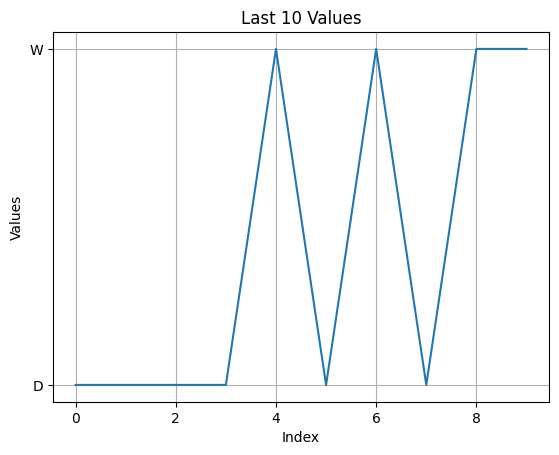

In [289]:
x_values_latest = range(len(latest_form(fg)))

plt.plot(x_values_latest, latest_form(fg))

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Last 10 Values')
plt.grid(True)

plt.show()

In [290]:
len(present_form(fg))

99

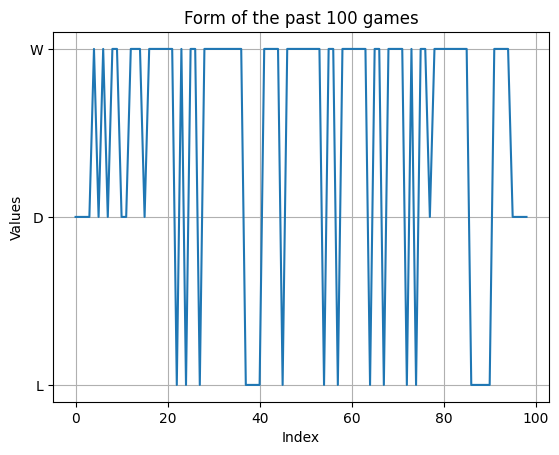

In [291]:
import matplotlib.pyplot as plt
import numpy as np

form = present_form(fg)

category_order = ['L', 'D', 'W']

numerical_values = np.array([category_order.index(category) for category in form])

x_values_latest = range(len(form))

plt.plot(x_values_latest, numerical_values)

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Form of the past 100 games')
plt.grid(True)
plt.yticks(range(len(category_order)), category_order)

plt.show()

In [813]:
#crucial step - adding the form of the last 10 games here..
#will be updated after each record - so not 100% static dataset
        
def result_for_caruana(row):
    if row['White'] == 'Caruana, Fabiano':
        return 'W' if row['Res'] == '1-0' else 'L' if row['Res'] == '0-1' else 'D'
    elif row['Black'] == 'Caruana, Fabiano':
        return 'W' if row['Res'] == '0-1' else 'L' if row['Res'] == '1-0' else 'D'
    return None

results_caruana = []
last_10_results = []

for index, row in fg.iterrows():
    result = result_for_caruana(row)
    if result is not None:
        results_caruana.insert(0, result)
    last_10_results.append(list(results_caruana[1:11]))  # copy the current state of last 10 results

fg['Last_10_Results'] = last_10_results

In [814]:
fg.head(50)

,Date,White,Black,W ELO,B ELO,Av ELO,Event,Site,ECO,Opening,Round,Res,Mvs,Last_10_Results,Elo Difference w.r.t. Fabi
999,NaN,"Navara, David","Caruana, Fabiano",2697.0,2792,2744,7th Gashimov Mem Blitz,Baku AZE,E94,"King's Indian Defense, Orthodox Variation",4.10,1-0,44,[],95.0
998,NaN,"Caruana, Fabiano","Rapport, Richard",2792.0,2763,2777,7th Gashimov Mem Blitz,Baku AZE,A40,"Horwitz Defense, General",3.20,½-½,52,[L],29.0
997,NaN,"Caruana, Fabiano","Mamedyarov, Shakhriyar",2792.0,2767,2779,7th Gashimov Mem Blitz,Baku AZE,A18,"English Opening, Anglo-Indian Defense, Flohr-M...",7.30,1-0,57,"[D, L]",25.0
996,NaN,"Rapport, Richard","Caruana, Fabiano",2763.0,2792,2777,7th Gashimov Mem Blitz,Baku AZE,C47,"Four Knights Game, Scotch Variation, Accepted",10.30,½-½,27,"[W, D, L]",29.0
995,NaN,"Caruana, Fabiano","Anand, Viswanathan",2792.0,2751,2771,7th Gashimov Mem Blitz,Baku AZE,C60,"Spanish Game, General",13.30,1-0,69,"[D, W, D, L]",41.0
994,NaN,"Caruana, Fabiano","Navara, David",2792.0,2697,2744,7th Gashimov Mem Blitz,Baku AZE,C60,"Spanish Game, General",11.40,1-0,56,"[W, D, W, D, L]",95.0
993,NaN,"Karjakin, Sergey","Caruana, Fabiano",2743.0,2792,2767,7th Gashimov Mem Blitz,Baku AZE,C89,"Spanish Game, Marshall Attack, Modern Variation",12.10,½-½,36,"[W, W, D, W, D, L]",49.0
992,NaN,"Asadli, Vugar Afgan Oglu","Caruana, Fabiano",2579.0,2792,2685,7th Gashimov Mem Blitz,Baku AZE,B90,"Sicilian Defense, Najdorf Variation, Freak Attack",8.40,0-1,31,"[D, W, W, D, W, D, L]",213.0
991,NaN,"Caruana, Fabiano","Rapport, Richard",2792.0,2763,2777,7th Gashimov Mem TB,Baku AZE,A46,"Indian Game, London System",1.00,1-0,48,"[W, D, W, W, D, W, D, L]",29.0
990,NaN,"Caruana, Fabiano","Mamedov, Rauf",2792.0,2656,2724,7th Gashimov Mem Blitz,Baku AZE,D32,"Tarrasch Defense, General",9.10,½-½,40,"[W, W, D, W, W, D, W, D, L]",136.0


In [815]:
fg['Elo Difference w.r.t. Fabi'] = ""
for index, row in fg.iterrows():
    if row["White"] == "Caruana, Fabiano":
        x = float(row["W ELO"]) - float(row["B ELO"])
        fg.at[index, "Elo Difference w.r.t. Fabi"] = x
    elif row["Black"] == "Caruana, Fabiano":
        x = float(row["B ELO"]) - float(row["W ELO"])
        fg.at[index, "Elo Difference w.r.t. Fabi"] = x

In [816]:
fg

,Date,White,Black,W ELO,B ELO,Av ELO,Event,Site,ECO,Opening,Round,Res,Mvs,Last_10_Results,Elo Difference w.r.t. Fabi
999,NaN,"Navara, David","Caruana, Fabiano",2697.0,2792,2744,7th Gashimov Mem Blitz,Baku AZE,E94,"King's Indian Defense, Orthodox Variation",4.1,1-0,44,[],95.0
998,NaN,"Caruana, Fabiano","Rapport, Richard",2792.0,2763,2777,7th Gashimov Mem Blitz,Baku AZE,A40,"Horwitz Defense, General",3.2,½-½,52,[L],29.0
997,NaN,"Caruana, Fabiano","Mamedyarov, Shakhriyar",2792.0,2767,2779,7th Gashimov Mem Blitz,Baku AZE,A18,"English Opening, Anglo-Indian Defense, Flohr-M...",7.3,1-0,57,"[D, L]",25.0
996,NaN,"Rapport, Richard","Caruana, Fabiano",2763.0,2792,2777,7th Gashimov Mem Blitz,Baku AZE,C47,"Four Knights Game, Scotch Variation, Accepted",10.3,½-½,27,"[W, D, L]",29.0
995,NaN,"Caruana, Fabiano","Anand, Viswanathan",2792.0,2751,2771,7th Gashimov Mem Blitz,Baku AZE,C60,"Spanish Game, General",13.3,1-0,69,"[D, W, D, L]",41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5/12/2023,"Caruana, Fabiano","Fedoseev, Vladimir",2781.0,2704,2742,PRO League KO 2023,chess.com INT,A21,"English Opening, King's English Variation, Kra...",1.3,1-0,76,"[D, W, D, W, W, D, D, W, W, W]",77.0
3,5/12/2023,"Caruana, Fabiano","Firouzja, Alireza",2781.0,2804,2792,Superbet Chess Classic Romania,"Bucharest, Romania",A11,"English Opening, Anglo-Slav Variation, General",6.3,½-½,45,"[W, D, W, D, W, W, D, D, W, W]",-23.0
2,5/13/2023,"So, Wesley","Caruana, Fabiano",2778.0,2781,2779,Superbet Chess Classic Romania,"Bucharest, Romania",E06,"Catalan Opening, Closed Variation",7.2,½-½,24,"[D, W, D, W, D, W, W, D, D, W]",3.0
1,5/14/2023,"Caruana, Fabiano","Giri, Anish",2781.0,2771,2776,Superbet Chess Classic Romania,"Bucharest, Romania",C53,"Italian Game, Classical Variation, Giuoco Pian...",8.1,½-½,26,"[D, D, W, D, W, D, W, W, D, D]",10.0


In [817]:
fg_w = fg.drop(['Av ELO','Round','Mvs','Date','Site','Event','ECO','Opening','W ELO','B ELO'], axis=1)
fg_w

,White,Black,Res,Last_10_Results,Elo Difference w.r.t. Fabi
999,"Navara, David","Caruana, Fabiano",1-0,[],95.0
998,"Caruana, Fabiano","Rapport, Richard",½-½,[L],29.0
997,"Caruana, Fabiano","Mamedyarov, Shakhriyar",1-0,"[D, L]",25.0
996,"Rapport, Richard","Caruana, Fabiano",½-½,"[W, D, L]",29.0
995,"Caruana, Fabiano","Anand, Viswanathan",1-0,"[D, W, D, L]",41.0
...,...,...,...,...,...
4,"Caruana, Fabiano","Fedoseev, Vladimir",1-0,"[D, W, D, W, W, D, D, W, W, W]",77.0
3,"Caruana, Fabiano","Firouzja, Alireza",½-½,"[W, D, W, D, W, W, D, D, W, W]",-23.0
2,"So, Wesley","Caruana, Fabiano",½-½,"[D, W, D, W, D, W, W, D, D, W]",3.0
1,"Caruana, Fabiano","Giri, Anish",½-½,"[D, D, W, D, W, D, W, W, D, D]",10.0


In [818]:
fg_w['Num_Result'] = ""
for index, row in fg_w.iterrows():
    
    if row["White"] == "Caruana, Fabiano":
        if row["Res"] == '1-0':
            fg_w.at[index, "Num_Result"] = 1
        elif row["Res"] == '0-1':
            fg_w.at[index, "Num_Result"] = 0
        else:
            fg_w.at[index, "Num_Result"] = 0.5
    
    if row["Black"] == "Caruana, Fabiano":
        if row["Res"] == '0-1':
            fg_w.at[index, "Num_Result"] = 1
        elif row["Res"] == '1-0':
            fg_w.at[index, "Num_Result"] = 0
        else:
            fg_w.at[index, "Num_Result"] = 0.5

fg_w.head(50)

,White,Black,Res,Last_10_Results,Elo Difference w.r.t. Fabi,Num_Result
999,"Navara, David","Caruana, Fabiano",1-0,[],95.0,0
998,"Caruana, Fabiano","Rapport, Richard",½-½,[L],29.0,0.5
997,"Caruana, Fabiano","Mamedyarov, Shakhriyar",1-0,"[D, L]",25.0,1
996,"Rapport, Richard","Caruana, Fabiano",½-½,"[W, D, L]",29.0,0.5
995,"Caruana, Fabiano","Anand, Viswanathan",1-0,"[D, W, D, L]",41.0,1
994,"Caruana, Fabiano","Navara, David",1-0,"[W, D, W, D, L]",95.0,1
993,"Karjakin, Sergey","Caruana, Fabiano",½-½,"[W, W, D, W, D, L]",49.0,0.5
992,"Asadli, Vugar Afgan Oglu","Caruana, Fabiano",0-1,"[D, W, W, D, W, D, L]",213.0,1
991,"Caruana, Fabiano","Rapport, Richard",1-0,"[W, D, W, W, D, W, D, L]",29.0,1
990,"Caruana, Fabiano","Mamedov, Rauf",½-½,"[W, W, D, W, W, D, W, D, L]",136.0,0.5


In [819]:
FG= fg_w.drop('Res', axis=1)
FG.head()

,White,Black,Last_10_Results,Elo Difference w.r.t. Fabi,Num_Result
999,"Navara, David","Caruana, Fabiano",[],95.0,0
998,"Caruana, Fabiano","Rapport, Richard",[L],29.0,0.5
997,"Caruana, Fabiano","Mamedyarov, Shakhriyar","[D, L]",25.0,1
996,"Rapport, Richard","Caruana, Fabiano","[W, D, L]",29.0,0.5
995,"Caruana, Fabiano","Anand, Viswanathan","[D, W, D, L]",41.0,1


In [820]:
FG["Binarized_Form"] = None
for index, row in FG.iterrows():
    k = [1 if x == "W" else 0 if x == "L" else 0.5 for x in row["Last_10_Results"]]
    FG.at[index, "Binarized_Form"] = k


In [821]:
FG['Binarized_Form'] = FG['Binarized_Form'].apply(lambda x: [float(val) for val in x])
FG.head(50)

,White,Black,Last_10_Results,Elo Difference w.r.t. Fabi,Num_Result,Binarized_Form
999,"Navara, David","Caruana, Fabiano",[],95.0,0,[]
998,"Caruana, Fabiano","Rapport, Richard",[L],29.0,0.5,[0.0]
997,"Caruana, Fabiano","Mamedyarov, Shakhriyar","[D, L]",25.0,1,"[0.5, 0.0]"
996,"Rapport, Richard","Caruana, Fabiano","[W, D, L]",29.0,0.5,"[1.0, 0.5, 0.0]"
995,"Caruana, Fabiano","Anand, Viswanathan","[D, W, D, L]",41.0,1,"[0.5, 1.0, 0.5, 0.0]"
994,"Caruana, Fabiano","Navara, David","[W, D, W, D, L]",95.0,1,"[1.0, 0.5, 1.0, 0.5, 0.0]"
993,"Karjakin, Sergey","Caruana, Fabiano","[W, W, D, W, D, L]",49.0,0.5,"[1.0, 1.0, 0.5, 1.0, 0.5, 0.0]"
992,"Asadli, Vugar Afgan Oglu","Caruana, Fabiano","[D, W, W, D, W, D, L]",213.0,1,"[0.5, 1.0, 1.0, 0.5, 1.0, 0.5, 0.0]"
991,"Caruana, Fabiano","Rapport, Richard","[W, D, W, W, D, W, D, L]",29.0,1,"[1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, 0.0]"
990,"Caruana, Fabiano","Mamedov, Rauf","[W, W, D, W, W, D, W, D, L]",136.0,0.5,"[1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, 0.0]"


In [822]:
cols = FG.drop(["Num_Result","White","Black","Last_10_Results"], axis=1)
cols

,Elo Difference w.r.t. Fabi,Binarized_Form
999,95.0,[]
998,29.0,[0.0]
997,25.0,"[0.5, 0.0]"
996,29.0,"[1.0, 0.5, 0.0]"
995,41.0,"[0.5, 1.0, 0.5, 0.0]"
...,...,...
4,77.0,"[0.5, 1.0, 0.5, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, ..."
3,-23.0,"[1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 0.5, 0.5, 1.0, ..."
2,3.0,"[0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 0.5, 0.5, ..."
1,10.0,"[0.5, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 0.5, ..."


In [823]:
output_col = FG["Num_Result"].drop(FG["Num_Result"].index[:10])

In [824]:
input_col = cols.drop(cols.index[:10])

In [825]:
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(input_col['Elo Difference w.r.t. Fabi'].values.reshape(-1, 1))

input_col['Normalized Difference'] = normalized_values

In [826]:
normalized_values

array([[0.08035714],
       [0.22172619],
       [0.25892857],
       [0.22470238],
       [0.29464286],
       [0.18005952],
       [0.13541667],
       [0.14732143],
       [0.11011905],
       [0.15699405],
       [0.14508929],
       [0.06919643],
       [0.08556548],
       [0.08258929],
       [0.27604167],
       [0.14732143],
       [0.19345238],
       [0.09821429],
       [0.16443452],
       [0.27306548],
       [0.1577381 ],
       [0.17708333],
       [0.23735119],
       [0.14434524],
       [0.15922619],
       [0.22693452],
       [0.19270833],
       [0.22470238],
       [0.20014881],
       [0.26488095],
       [0.25669643],
       [0.14955357],
       [0.22470238],
       [0.22842262],
       [0.09821429],
       [0.11011905],
       [0.12425595],
       [0.11532738],
       [0.11979167],
       [0.0766369 ],
       [0.08556548],
       [0.12872024],
       [0.15104167],
       [0.08333333],
       [0.19568452],
       [0.00744048],
       [0.08035714],
       [0.207

In [827]:
input_col = input_col.drop(["Elo Difference w.r.t. Fabi"], axis=1)

In [828]:
X = input_col
Y = output_col

In [829]:
X.head(50)

,Binarized_Form,Normalized Difference
989,"[0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, ...",0.080357
988,"[1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, ...",0.221726
987,"[1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, ...",0.258929
986,"[1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, ...",0.224702
985,"[0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, ...",0.294643
984,"[1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, ...",0.180060
983,"[0.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, ...",0.135417
982,"[1.0, 0.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, ...",0.147321
981,"[0.5, 1.0, 0.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, ...",0.110119
980,"[1.0, 0.5, 1.0, 0.0, 1.0, 0.5, 1.0, 1.0, 1.0, ...",0.156994


In [830]:
Y

989      1
988      1
987      1
986    0.5
985      1
      ... 
4        1
3      0.5
2      0.5
1      0.5
0      0.5
Name: Num_Result, Length: 990, dtype: object

In [1169]:
train_size = int(990 * 0.8)

In [1170]:
X_train = X[:train_size]
Y_train = Y[:train_size]

# Remaining goes into the test set
X_test = X[train_size:]
Y_test = Y[train_size:]

In [1171]:
print(X_test.dtypes)

Binarized_Form            object
Normalized Difference    float64
dtype: object


In [1172]:
X_train

,Binarized_Form,Normalized Difference
989,"[0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.5, ...",0.080357
988,"[1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, ...",0.221726
987,"[1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, ...",0.258929
986,"[1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, ...",0.224702
985,"[0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, ...",0.294643
...,...,...
202,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",0.260417
201,"[0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",0.442708
200,"[1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",0.174107
199,"[1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.151786


In [1173]:
X_train.columns

Index(['Binarized_Form', 'Normalized Difference'], dtype='object')

In [1174]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Convert lists in 'Binarized_Form' into numpy array of type float32
X_train['Binarized_Form'] = X_train['Binarized_Form'].apply(lambda x: np.array([float(i) for i in x], dtype=np.float32))

# Convert lists into a multi-dimensional numpy array and pad sequences to the same length
X_train_padded = pad_sequences(X_train['Binarized_Form'].tolist(), padding='post', dtype='float32')  # use dtype='float32'

# # Add 'Elo Difference w.r.t. Fabi' as additional features
X_train_final = np.hstack((X_train['Normalized Difference'].values.reshape(-1, 1), X_train_padded))

# Convert Y_train to float32
Y_train = Y_train.astype(np.float32)

C:\Users\User\AppData\Local\Temp\ipykernel_19832\49391738.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Binarized_Form'] = X_train['Binarized_Form'].apply(lambda x: np.array([float(i) for i in x], dtype=np.float32))


In [1175]:
print(X_train_final.dtype)

float64


In [1176]:
X_train_final.shape

(792, 11)

In [1177]:
np.set_printoptions(threshold=np.inf)
print(X_train_final)

[[0.08035714 0.5        1.         1.         0.5        1.
  1.         0.5        1.         0.5        0.        ]
 [0.22172619 1.         0.5        1.         1.         0.5
  1.         1.         0.5        1.         0.5       ]
 [0.25892857 1.         1.         0.5        1.         1.
  0.5        1.         1.         0.5        1.        ]
 [0.22470238 1.         1.         1.         0.5        1.
  1.         0.5        1.         1.         0.5       ]
 [0.29464286 0.5        1.         1.         1.         0.5
  1.         1.         0.5        1.         1.        ]
 [0.18005952 1.         0.5        1.         1.         1.
  0.5        1.         1.         0.5        1.        ]
 [0.13541667 0.         1.         0.5        1.         1.
  1.         0.5        1.         1.         0.5       ]
 [0.14732143 1.         0.         1.         0.5        1.
  1.         1.         0.5        1.         1.        ]
 [0.11011905 0.5        1.         0.         1.      

In [1178]:
Y_train

989    1.0
988    1.0
987    1.0
986    0.5
985    1.0
      ... 
202    0.5
201    1.0
200    1.0
199    1.0
198    1.0
Name: Num_Result, Length: 792, dtype: float32

In [1179]:
len(Y_train)

792

In [1200]:
Y_train.shape

(792,)

In [1201]:
def model():
    model = Sequential()
    model.add(Dense(units=98, activation='relu', input_dim = 11))
    model.add(Dense(units=32))
    model.add(Dense(units=3, activation='softmax'))
    model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])
    return model

In [1202]:
model = model()

In [1203]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 98)                1176      
                                                                 
 dense_106 (Dense)           (None, 32)                3168      
                                                                 
 dense_107 (Dense)           (None, 3)                 99        
                                                                 
Total params: 4,443
Trainable params: 4,443
Non-trainable params: 0
_________________________________________________________________


In [1204]:
n_features = X_train_final.shape[1]
n_features

11

In [1205]:
X_train_final.shape

(792, 11)

In [1206]:
Y_train_encoded = pd.get_dummies(Y_train).values

In [1207]:
Y_train_encoded.shape

(792, 3)

In [1208]:
X_train_final

array([[0.08035714, 0.5       , 1.        , 1.        , 0.5       ,
        1.        , 1.        , 0.5       , 1.        , 0.5       ,
        0.        ],
       [0.22172619, 1.        , 0.5       , 1.        , 1.        ,
        0.5       , 1.        , 1.        , 0.5       , 1.        ,
        0.5       ],
       [0.25892857, 1.        , 1.        , 0.5       , 1.        ,
        1.        , 0.5       , 1.        , 1.        , 0.5       ,
        1.        ],
       [0.22470238, 1.        , 1.        , 1.        , 0.5       ,
        1.        , 1.        , 0.5       , 1.        , 1.        ,
        0.5       ],
       [0.29464286, 0.5       , 1.        , 1.        , 1.        ,
        0.5       , 1.        , 1.        , 0.5       , 1.        ,
        1.        ],
       [0.18005952, 1.        , 0.5       , 1.        , 1.        ,
        1.        , 0.5       , 1.        , 1.        , 0.5       ,
        1.        ],
       [0.13541667, 0.        , 1.        , 0.5       , 1.

In [1209]:
Y_train_encoded

array([[False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [ T

In [1210]:
model.fit(X_train_final, Y_train_encoded, epochs=200, batch_size=16)

Epoch 1/200
50/50 [==============================] - 1s 971us/step - loss: 1.0556 - accuracy: 0.4621
Epoch 2/200
50/50 [==============================] - 0s 1ms/step - loss: 1.0122 - accuracy: 0.5265
Epoch 3/200
50/50 [==============================] - 0s 1ms/step - loss: 1.0082 - accuracy: 0.5354
Epoch 4/200
50/50 [==============================] - 0s 1ms/step - loss: 1.0016 - accuracy: 0.5354
Epoch 5/200
50/50 [==============================] - 0s 1ms/step - loss: 0.9988 - accuracy: 0.5366
Epoch 6/200
50/50 [==============================] - 0s 1ms/step - loss: 0.9947 - accuracy: 0.5354
Epoch 7/200
50/50 [==============================] - 0s 1ms/step - loss: 0.9916 - accuracy: 0.5354
Epoch 8/200
50/50 [==============================] - 0s 1ms/step - loss: 0.9860 - accuracy: 0.5379
Epoch 9/200
50/50 [==============================] - 0s 1ms/step - loss: 0.9865 - accuracy: 0.5379
Epoch 10/200
50/50 [==============================] - 0s 1ms/step - loss: 0.9841 - accuracy: 0.5366
Epoch 1

50/50 [==============================] - 0s 1ms/step - loss: 0.8930 - accuracy: 0.6010
Epoch 83/200
50/50 [==============================] - 0s 1ms/step - loss: 0.8957 - accuracy: 0.5972
Epoch 84/200
50/50 [==============================] - 0s 872us/step - loss: 0.8936 - accuracy: 0.6124
Epoch 85/200
50/50 [==============================] - 0s 913us/step - loss: 0.8933 - accuracy: 0.5960
Epoch 86/200
50/50 [==============================] - 0s 851us/step - loss: 0.8932 - accuracy: 0.6035
Epoch 87/200
50/50 [==============================] - 0s 1ms/step - loss: 0.8935 - accuracy: 0.6023
Epoch 88/200
50/50 [==============================] - 0s 953us/step - loss: 0.8903 - accuracy: 0.6035
Epoch 89/200
50/50 [==============================] - 0s 861us/step - loss: 0.8936 - accuracy: 0.6035
Epoch 90/200
50/50 [==============================] - 0s 1ms/step - loss: 0.8891 - accuracy: 0.6023
Epoch 91/200
50/50 [==============================] - 0s 870us/step - loss: 0.8950 - accuracy: 0.6023
E

50/50 [==============================] - 0s 1ms/step - loss: 0.8506 - accuracy: 0.6288
Epoch 163/200
50/50 [==============================] - 0s 1ms/step - loss: 0.8545 - accuracy: 0.6237
Epoch 164/200
50/50 [==============================] - 0s 993us/step - loss: 0.8593 - accuracy: 0.6237
Epoch 165/200
50/50 [==============================] - 0s 1ms/step - loss: 0.8531 - accuracy: 0.6250
Epoch 166/200
50/50 [==============================] - 0s 907us/step - loss: 0.8556 - accuracy: 0.6250
Epoch 167/200
50/50 [==============================] - 0s 836us/step - loss: 0.8558 - accuracy: 0.6250
Epoch 168/200
50/50 [==============================] - 0s 816us/step - loss: 0.8589 - accuracy: 0.6212
Epoch 169/200
50/50 [==============================] - 0s 1ms/step - loss: 0.8532 - accuracy: 0.6414
Epoch 170/200
50/50 [==============================] - 0s 1ms/step - loss: 0.8511 - accuracy: 0.6338
Epoch 171/200
50/50 [==============================] - 0s 1ms/step - loss: 0.8500 - accuracy: 0.6

In [1211]:
# Convert 'Elo Difference w.r.t. Fabi' to float32
X_test['Normalized Difference'] = X_test['Normalized Difference'].astype(np.float32)

# Convert lists in 'Binarized_Form' into numpy array of type float32
X_test['Binarized_Form'] = X_test['Binarized_Form'].apply(lambda x: np.array([float(i) for i in x], dtype=np.float32))

# Convert lists into a multi-dimensional numpy array and pad sequences to the same length
X_test_padded = pad_sequences(X_test['Binarized_Form'].tolist(), padding='post', dtype='float32')  # use dtype='float32'

# Add 'Elo Difference w.r.t. Fabi' as additional features
X_test_final = np.hstack((X_test['Normalized Difference'].values.reshape(-1, 1), X_test_padded))

# Convert Y_train to float32
Y_test = Y_test.astype(np.float32)

C:\Users\User\AppData\Local\Temp\ipykernel_19832\980336580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Normalized Difference'] = X_test['Normalized Difference'].astype(np.float32)
C:\Users\User\AppData\Local\Temp\ipykernel_19832\980336580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Binarized_Form'] = X_test['Binarized_Form'].apply(lambda x: np.array([float(i) for i in x], dtype=np.float32))


In [1212]:
X_test

,Binarized_Form,Normalized Difference
197,"[1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, ...",0.418899
196,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, ...",0.076637
195,"[0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, ...",NaN
194,"[0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, ...",0.258185
193,"[1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, ...",0.173363
...,...,...
4,"[0.5, 1.0, 0.5, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, ...",0.119048
3,"[1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 0.5, 0.5, 1.0, ...",0.044643
2,"[0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 0.5, 0.5, ...",0.063988
1,"[0.5, 0.5, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 0.5, ...",0.069196


In [1213]:
print(X_test_final.dtype)

float32


In [1214]:
result = model.predict(X_test_final)

7/7 [==============================] - 0s 1ms/step


In [1215]:
np.set_printoptions(threshold=np.inf)
print(result)

[[4.85900193e-02 3.19850594e-02 9.19424951e-01]
 [2.15255395e-01 3.88729364e-01 3.96015257e-01]
 [           nan            nan            nan]
 [1.10793166e-01 8.22156668e-02 8.06991160e-01]
 [1.54977098e-01 2.72704720e-01 5.72318196e-01]
 [6.43504709e-02 3.23461033e-02 9.03303444e-01]
 [1.54912278e-01 3.33467692e-01 5.11619985e-01]
 [9.86530557e-02 5.93201704e-02 8.42026830e-01]
 [7.26392791e-02 4.85131219e-02 8.78847599e-01]
 [1.26161695e-01 1.53847873e-01 7.19990373e-01]
 [9.99739543e-02 8.27315673e-02 8.17294419e-01]
 [5.55369332e-02 7.01086372e-02 8.74354422e-01]
 [5.01479022e-02 4.53936197e-02 9.04458463e-01]
 [1.19887270e-01 1.87720791e-01 6.92391932e-01]
 [5.07182032e-02 3.34074907e-02 9.15874302e-01]
 [5.53501025e-02 3.98798548e-02 9.04770017e-01]
 [1.57968163e-01 1.73217595e-01 6.68814242e-01]
 [2.12647885e-01 8.32018703e-02 7.04150259e-01]
 [1.16466902e-01 5.53524122e-02 8.28180671e-01]
 [3.07332724e-01 2.39373922e-01 4.53293324e-01]
 [1.18682280e-01 9.89738181e-02 7.823438

In [1216]:
# Get the indices of the maximum probabilities
predicted_classes = np.argmax(result, axis=1)

# Create a mapping of class indices to labels
class_index_to_label_mapping = {0: 0, 1: 0.5, 2: 1}

# Map the predicted class indices to labels
predicted_labels = [class_index_to_label_mapping[i] for i in predicted_classes]

print(predicted_labels)

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 0.5, 1, 0.5, 1, 0.5, 1, 1, 1, 1, 1, 0.5, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 0.5, 1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 1, 1, 0.5, 1, 0.5, 1, 1, 1]


In [1217]:
print(Y_test.isna().any())

False


In [1218]:
Y_test.head(50)

197    1.0
196    0.0
195    0.0
194    1.0
193    0.0
192    1.0
191    1.0
190    1.0
189    1.0
188    1.0
187    1.0
186    0.0
185    0.0
184    0.0
183    1.0
182    1.0
181    0.0
180    0.0
179    0.0
178    0.0
177    1.0
176    1.0
175    0.0
174    1.0
173    0.0
172    0.0
171    1.0
170    1.0
169    1.0
168    1.0
167    1.0
166    1.0
165    0.0
164    1.0
163    0.0
162    1.0
161    1.0
160    0.0
159    1.0
158    0.0
157    1.0
156    0.0
155    1.0
154    1.0
153    1.0
152    1.0
151    1.0
150    1.0
149    0.0
148    1.0
Name: Num_Result, dtype: float32

In [1219]:
Y_test = (Y_test).astype(int) 
predicted_labels = [int(label) for label in predicted_labels]
print('Accuracy: ', accuracy_score(Y_test, predicted_labels))

Accuracy:  0.6464646464646465
